In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

#from confusion_matrix_pretty_print import print_confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV,KFold

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [5]:
credit = pd.read_csv('C:/Users/Dell inspiron 13/Desktop/ISDM/UCI Credit Card Dataset.csv')

In [6]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
1,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
2,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
3,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
4,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0


In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   210

In [8]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14993.770857,167874.270476,1.603048,1.850095,1.551810,35.462143,-0.012095,-0.129619,-0.155619,-0.210571,...,43600.699000,40809.330476,39251.256762,5704.560571,5.950701e+03,5315.111476,4896.324000,4719.545333,5209.750524,0.220619
std,8668.196989,129950.647941,0.489278,0.789235,0.521075,9.218638,1.121270,1.200290,1.203900,1.176035,...,64725.284031,61745.214421,60585.398951,17091.273207,2.194975e+04,18465.706015,16205.508521,14700.389715,17785.833504,0.414674
min,2.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-53007.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7482.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2400.000000,1828.750000,1280.000000,1000.000000,8.097500e+02,390.000000,300.000000,259.000000,108.750000,0.000000
50%,14955.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19183.000000,18291.500000,17270.000000,2100.000000,2.007000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22539.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,55064.750000,50641.000000,49326.250000,5012.000000,5.000000e+03,4504.250000,4000.000000,4005.000000,4000.000000,0.000000
max,29999.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
#supprimer la variable Loan_ID
credit.drop('ID', axis = 1, inplace = True)

In [10]:
## creation de deux datasets 
X = credit.drop(columns='default.payment.next.month')
y = credit['default.payment.next.month'] #target                                           

 le pourcentage des defauts de paiements est : 0.22061904761904763
 le pourcentage des defauts de non paiements est  : 0.7793809523809524


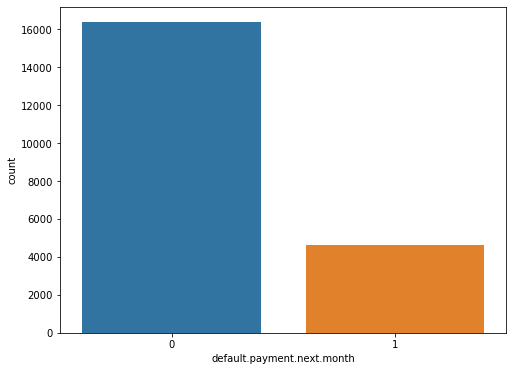

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(y)
yes = y.value_counts()[1]/len(y)
no = y.value_counts()[0]/len(y)
print(f' le pourcentage des defauts de paiements est : {yes}')
print(f' le pourcentage des defauts de non paiements est  : {no}')

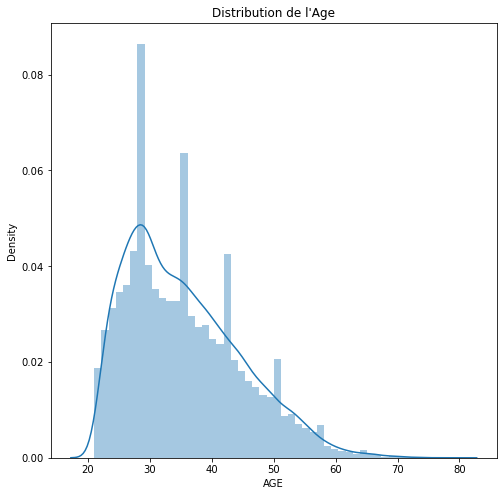

In [12]:
plt.figure(figsize = (8,8))
plt.title("Distribution de l'Age")
sns.distplot(credit['AGE'])
plt.show()

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='Density'>

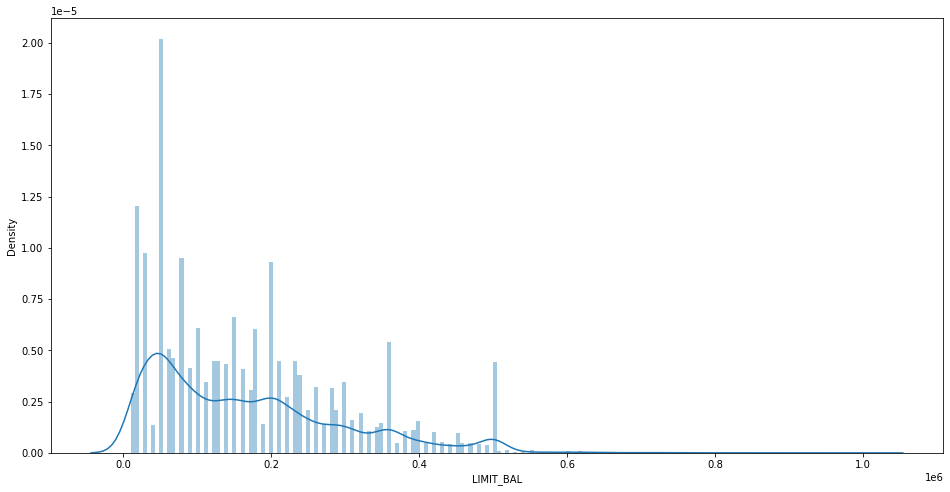

In [13]:
plt.figure(figsize=(16,8))
sns.distplot(credit['LIMIT_BAL'], kde=True, bins = 180)

<AxesSubplot:xlabel='MARRIAGE', ylabel='AGE'>

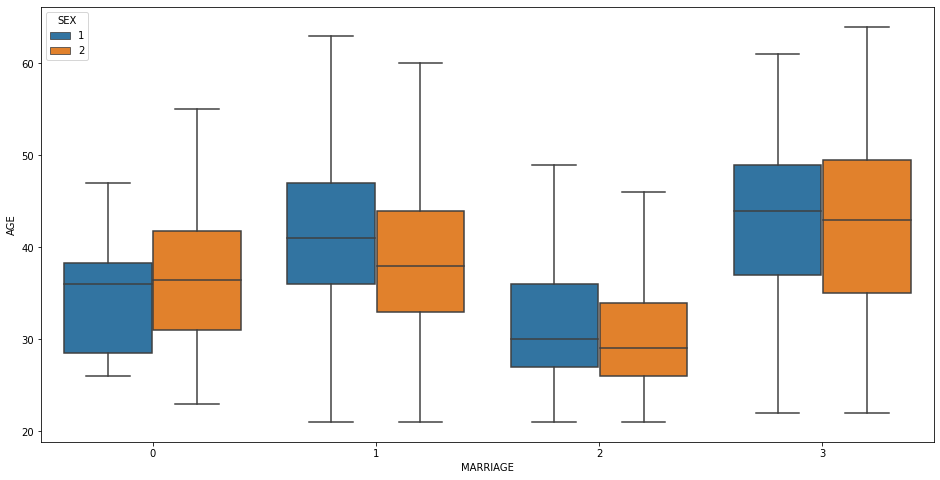

In [14]:
plt.figure(figsize=(16,8))
sns.boxplot(x= 'MARRIAGE', y='AGE',hue='SEX',showfliers=False ,data=credit)

<AxesSubplot:xlabel='EDUCATION', ylabel='AGE'>

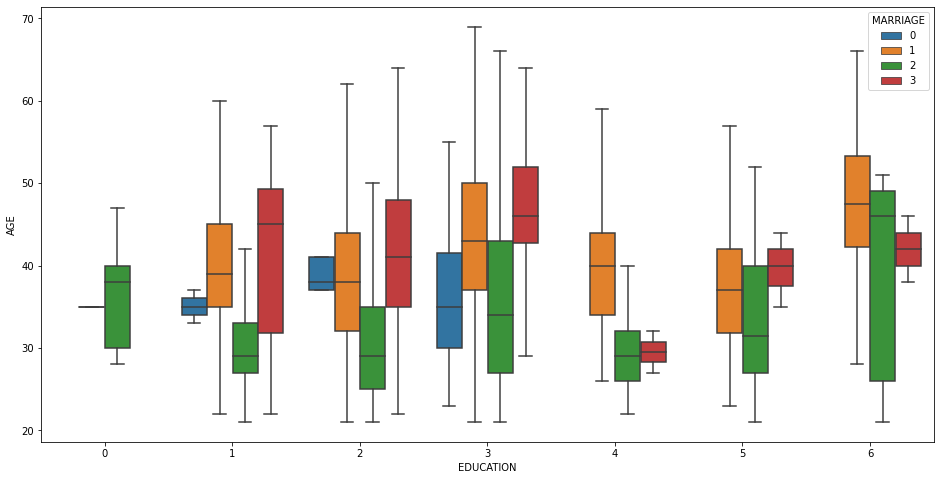

In [15]:
plt.figure(figsize=(16,8))
sns.boxplot(x= 'EDUCATION', y='AGE',hue='MARRIAGE',showfliers=False ,data=credit)

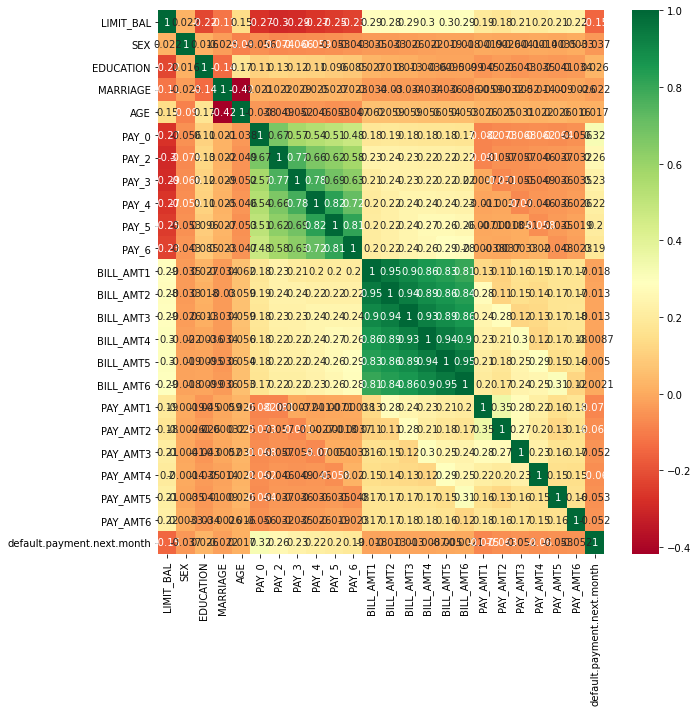

<Figure size 720x720 with 0 Axes>

In [16]:
corrmat = credit.corr()
corr_var = corrmat.index[()]

# Plotting the correlation matrix
plt.figure(figsize=(10,10))
g = sns.heatmap(credit[corr_var].corr(),
                annot=True,cmap="RdYlGn")

plt.figure(figsize=(10, 10))
plt.show()

In [17]:
standardized = StandardScaler()
standardized.fit(X)
X_norme = standardized.transform(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [72]:
model =  DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [73]:

predictions = model.predict(X_test)

cm = confusion_matrix(y_test,predictions)


print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4909
           1       0.68      0.37      0.48      1391

    accuracy                           0.82      6300
   macro avg       0.76      0.66      0.68      6300
weighted avg       0.81      0.82      0.80      6300



In [74]:
precision = metrics.accuracy_score(predictions,y_test)
print("La précision du modèle de la decision tree :  %s" % "{0:.2%}".format(precision))

La précision du modèle de la decision tree :  82.25%


In [75]:
#X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.30, random_state=0)
                                                     
                                                    
model = LogisticRegression()
model.fit(X_train,y_train)
predictions_ = model.predict(X_test)
print(classification_report(y_test,predictions_))

warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4909
           1       0.33      0.00      0.00      1391

    accuracy                           0.78      6300
   macro avg       0.56      0.50      0.44      6300
weighted avg       0.68      0.78      0.68      6300



In [76]:
# Précision du modèle 

precision = metrics.accuracy_score(predictions_,y_test)
print("La précision de la régression logistique :  %s" % "{0:.2%}".format(precision))

La précision de la régression logistique :  77.87%


In [77]:
#On va appliquer trois algorithmes  Logistic Regression, KNN, DecisionTree
models = {
    'LogisticRegression' : LogisticRegression(random_state = 0),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionClassifier' : DecisionTreeClassifier(max_depth =1, random_state = 0)   
}
#la fonction de precision
def accu(y_true, y_pred, retu =False):
    acc = accuracy_score(y_true, y_pred)
    if retu:
        return acc
    else:
        print(f'la precision du modele est: {acc}')
#la fonction d'application des modeles
def train_test_eval(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(name,':')
        model.fit(X_train, y_train)
        accu(y_test, model.predict(X_test))
        print('-'*5)
        
train_test_eval(models, X_train,y_train,X_test,y_test)

LogisticRegression :
la precision du modele est: 0.7787301587301587
-----
KNeighborsClassifier :
la precision du modele est: 0.7468253968253968
-----
DecisionClassifier :
la precision du modele est: 0.8223809523809524
-----


In [64]:
#import Joblib library
from joblib import dump

In [78]:
dump(model, "C:/Users/Dell inspiron 13/Desktop/ISDM/Card.joblib")

['C:/Users/Dell inspiron 13/Desktop/ISDM/Card.joblib']